In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
df = pd.read_csv("hotel_bookings.csv")
df

Исследовать данные.

In [50]:
print(df.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

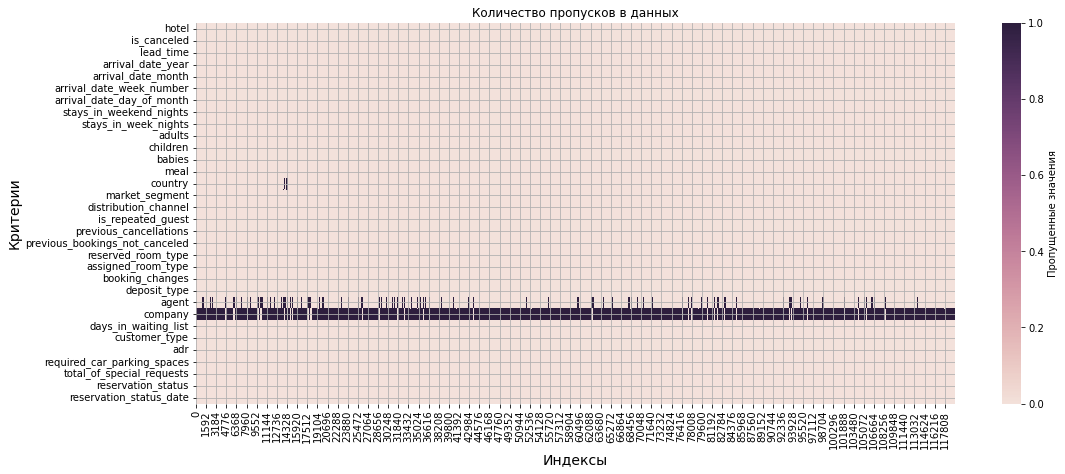

In [51]:
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

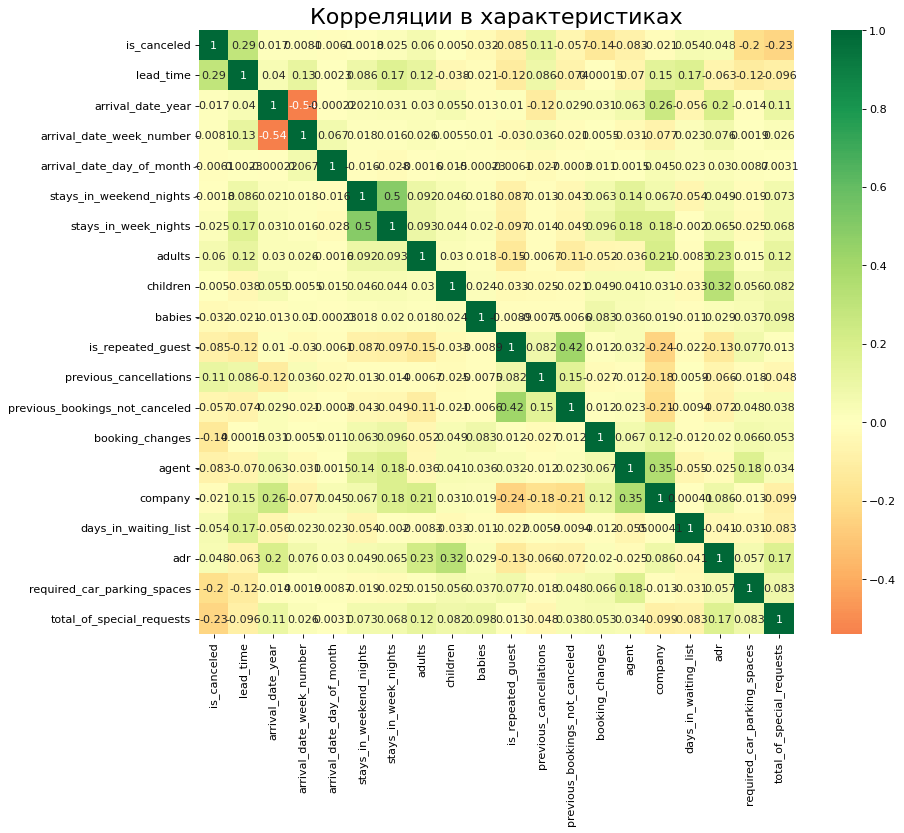

In [52]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [53]:
df = df.drop(columns = ['company', 'reservation_status_date', 'reservation_status'])
df['agent'] = df['agent'].fillna(df['agent'].mean())
df = df.dropna(axis='index', how='any', subset=['country'])
df = df.dropna(axis='index', how='any', subset=['children'])

In [54]:
le = preprocessing.LabelEncoder()

df['hotel'] = preprocessing.LabelEncoder().fit_transform(df['hotel'])
df['arrival_date_month'] = preprocessing.LabelEncoder().fit_transform(df['arrival_date_month'])
df['meal'] = preprocessing.LabelEncoder().fit_transform(df['meal'])
df['country'] = preprocessing.LabelEncoder().fit_transform(df['country'])
df['market_segment'] = preprocessing.LabelEncoder().fit_transform(df['market_segment'])
df['distribution_channel'] = preprocessing.LabelEncoder().fit_transform(df['distribution_channel'])
df['reserved_room_type'] = preprocessing.LabelEncoder().fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = preprocessing.LabelEncoder().fit_transform(df['assigned_room_type'])
df['deposit_type'] = preprocessing.LabelEncoder().fit_transform(df['deposit_type'])
df['customer_type'] = preprocessing.LabelEncoder().fit_transform(df['customer_type'])

Создать тренировочную и тестовую подвыборки

In [55]:
y = df['is_canceled']
x = df.drop(columns='is_canceled')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Построить модель логистической регрессии по своему набору данных

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему

In [57]:
w0 = model.intercept_
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print(w0)
mas

[-4.62903897e-06]


[('agent', -0.0005054137909490069),
 ('children', -0.001001517308191964),
 ('arrival_date_year', -0.0017248068491790285),
 ('days_in_waiting_list', -0.002199054935704394),
 ('babies', -0.0036675875602639697),
 ('arrival_date_week_number', -0.004280984072253362),
 ('lead_time', 0.005401861699131969),
 ('adr', 0.007909870352656277),
 ('meal', -0.008131391190746752),
 ('arrival_date_day_of_month', -0.009711620628610746),
 ('stays_in_weekend_nights', 0.011757603641570066),
 ('is_repeated_guest', -0.014383454863915096),
 ('country', 0.01532818242803687),
 ('adults', 0.02057092949545831),
 ('stays_in_week_nights', 0.03332309462895464),
 ('hotel', -0.035441454902334225),
 ('arrival_date_month', -0.03813844591359178),
 ('required_car_parking_spaces', -0.04724354419222265),
 ('reserved_room_type', -0.05783476396886865),
 ('customer_type', -0.06125190182214384),
 ('previous_cancellations', 0.07581509507916098),
 ('previous_bookings_not_canceled', -0.0785631105096623),
 ('booking_changes', -0.105

Написать уравнение логистической регрессии

In [58]:
ans = str(w0)
for i in range(28):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

[-4.62903897e-06] + -0.035441454902334225 * hotel + 0.005401861699131969 * is_canceled + -0.0017248068491790285 * lead_time + -0.03813844591359178 * arrival_date_year + -0.004280984072253362 * arrival_date_month + -0.009711620628610746 * arrival_date_week_number + 0.011757603641570066 * arrival_date_day_of_month + 0.03332309462895464 * stays_in_weekend_nights + 0.02057092949545831 * stays_in_week_nights + -0.001001517308191964 * adults + -0.0036675875602639697 * children + -0.008131391190746752 * babies + 0.01532818242803687 * meal + 0.14874788202120642 * country + 0.12847932771132692 * market_segment + -0.014383454863915096 * distribution_channel + 0.07581509507916098 * is_repeated_guest + -0.0785631105096623 * previous_cancellations + -0.05783476396886865 * previous_bookings_not_canceled + -0.2582583228630072 * reserved_room_type + -0.10508802046025012 * assigned_room_type + 0.1112062571219199 * booking_changes + -0.0005054137909490069 * deposit_type + -0.002199054935704394 * agent +

Вывести confusion matrix для получившейся модели

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
cm = confusion_matrix(y_test, answers_pred)
cm

array([[19037,  3420],
       [ 6084,  7129]])

Вручную посчитать метрики: accuracy, recall, precision. f1

In [61]:
print('accuracy:', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.7335576114381833
recall: 0.7578121890052147
precision: 0.8477089548915706
f1: 0.8002438101643617


Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7

In [62]:
print('accuracy:', accuracy_score(y_test, answers_pred))
print('recall:', recall_score(y_test, answers_pred))
print('precision:', precision_score(y_test, answers_pred))
print('f1:', f1_score(y_test, answers_pred))

accuracy: 0.7335576114381833
recall: 0.5395443881026262
precision: 0.6757986539008437
f1: 0.6000336671997306


Сделать письменный вывод получившихся результатов (хорошие или плохие получились метрики и почему)